In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "2" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

save_folder = "gd1_tail"

# Load data

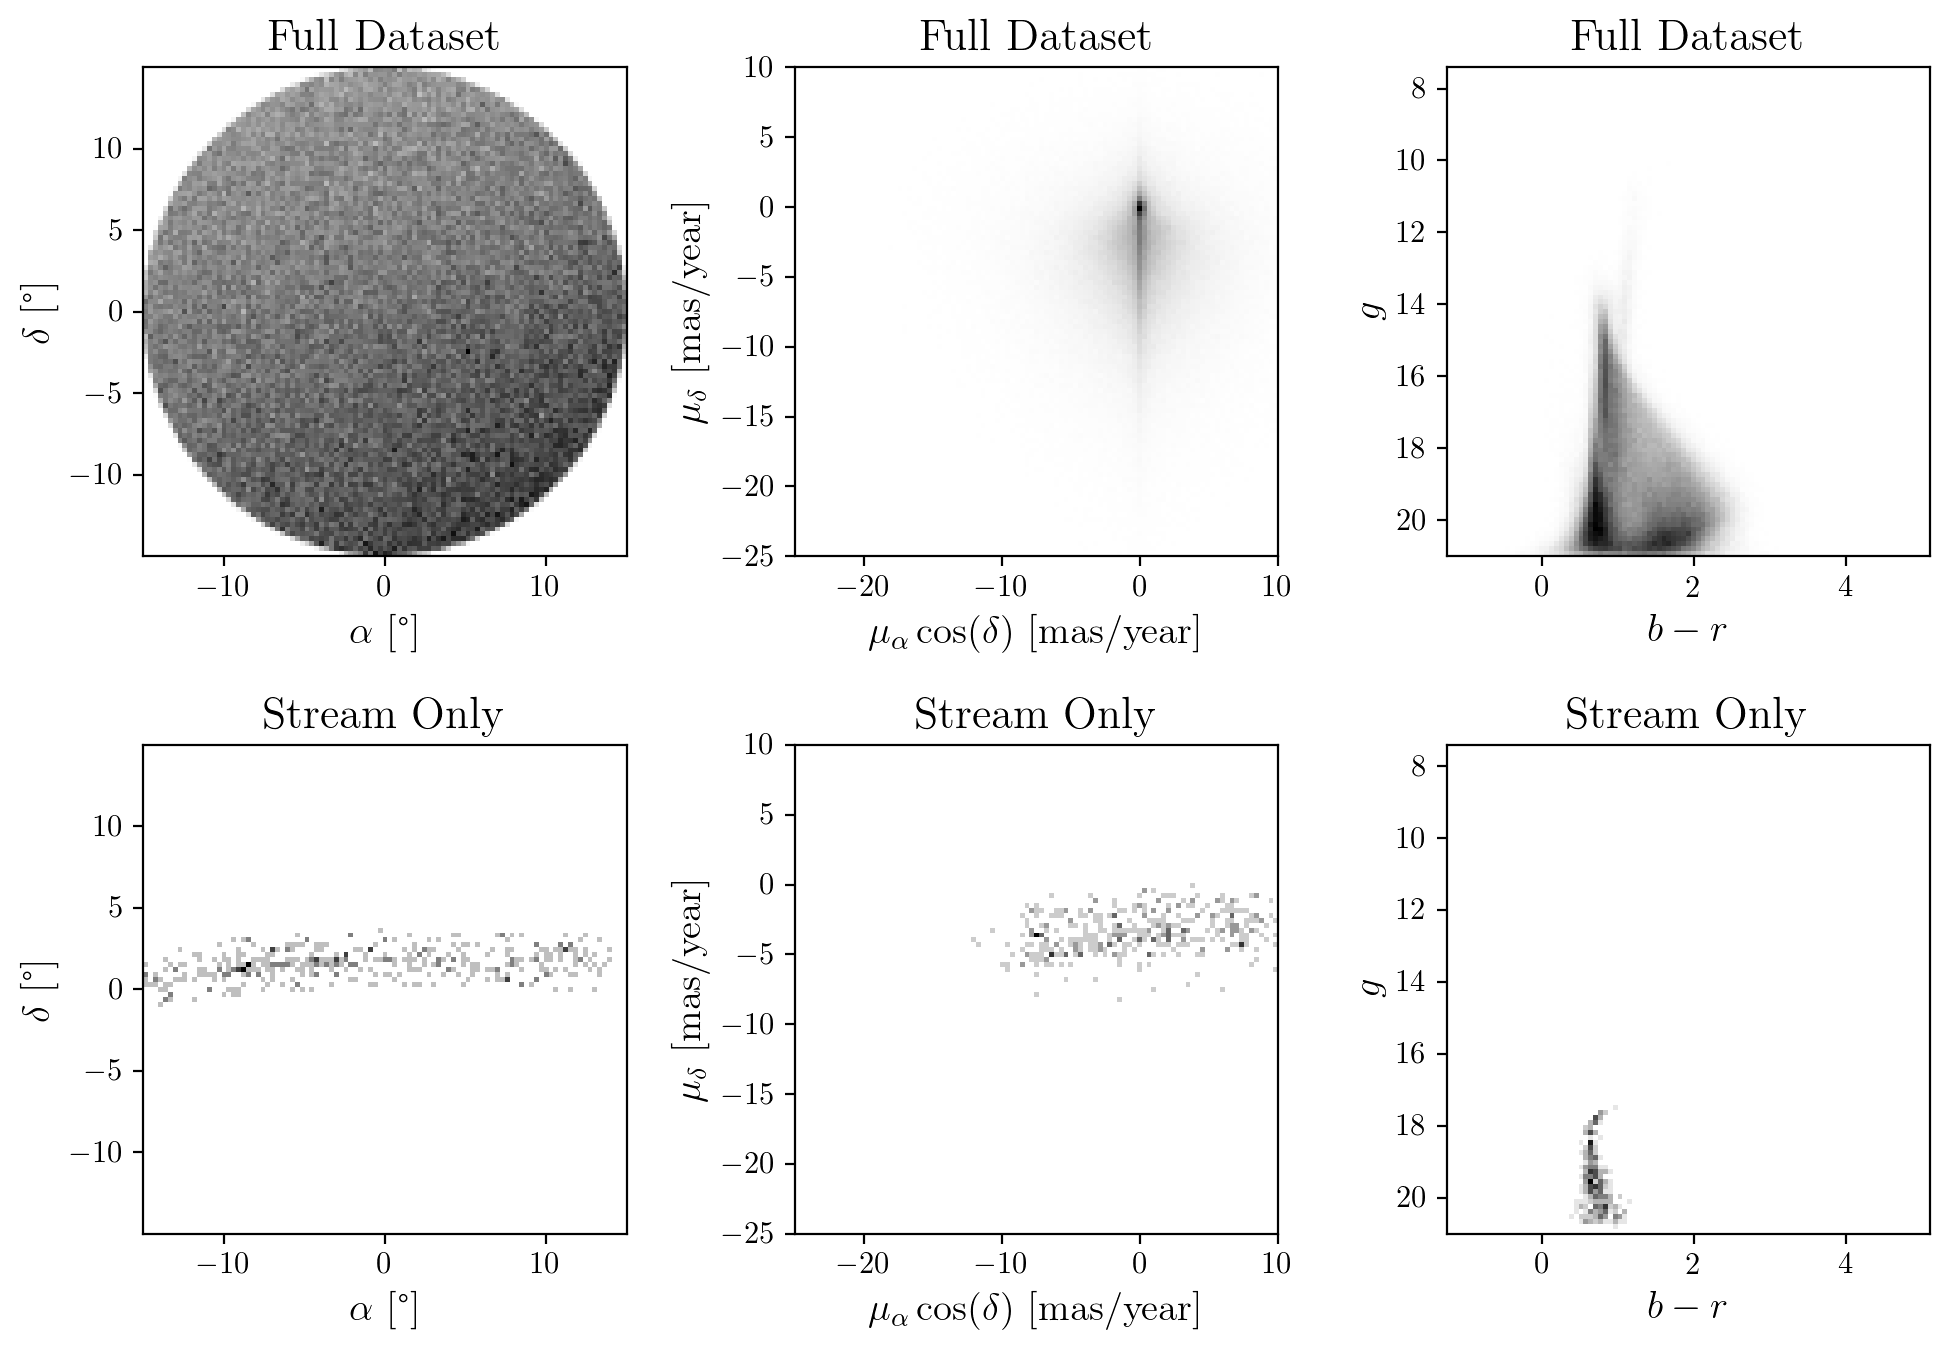

In [14]:
stream = "gd1_tail"
df, file = load_file(stream = stream)
plot_coords(df, save_folder = save_folder)

SR factor: 0.5
SB factor: 3
Sideband region: [-7.8,-4.2) & (-2.8,0.8]
Signal region: [-4.2,-2.8]
Total counts: SR = 71,497, SB = 296,614
Signal region has 150 stream and 71,347 bkg events (0.21%).
Sideband region has 393 stream and 367,718 bkg events (0.11%).
f_sig = 2.0X f_sideband.


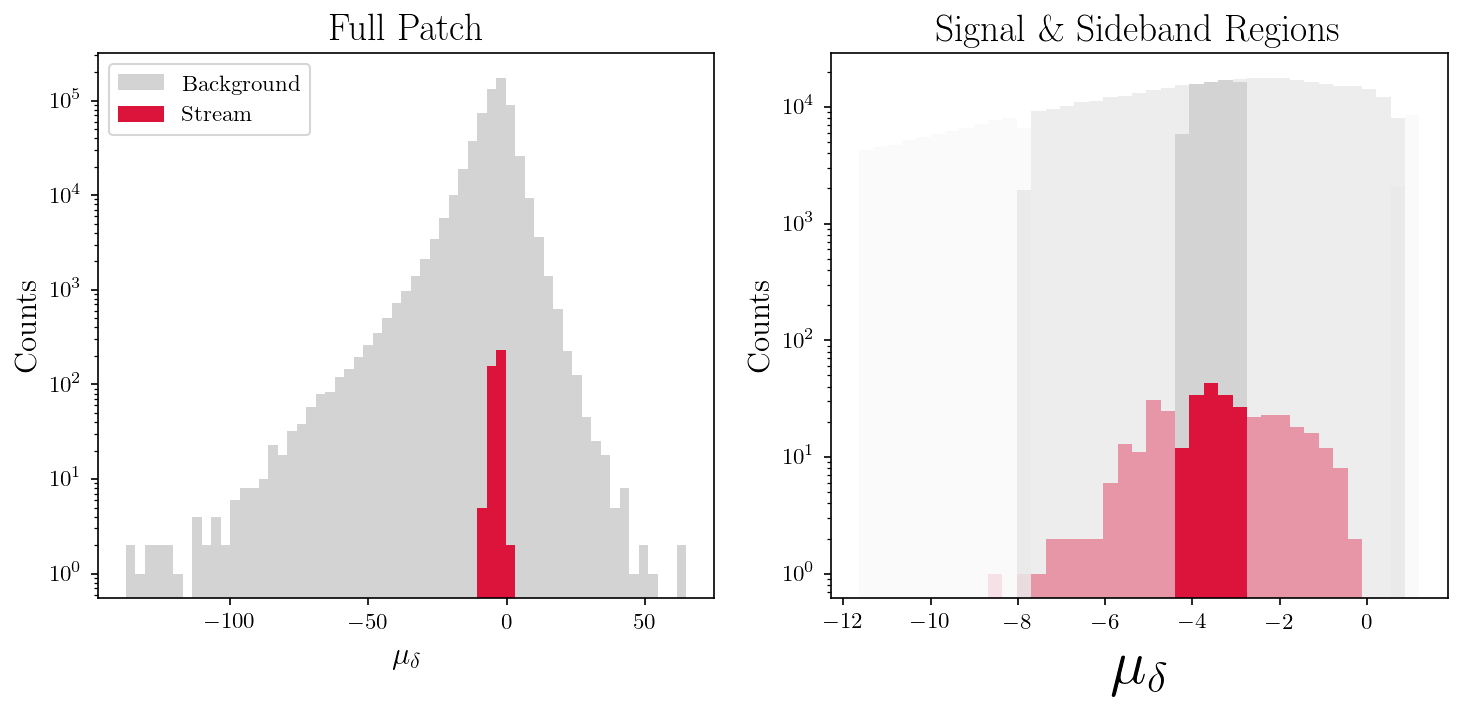

In [69]:
df_slice = signal_sideband(df, sr_factor = 0.5, sb_factor=3, stream = stream, save_folder = save_folder)

# Train

In [70]:
print("Dataframe has {:,} stars, of which {:,} are stream stars.".format(
    len(df_slice), 
    len(df_slice[df_slice.stream])))

Dataframe has 368,111 stars, of which 393 are stream stars.


In [ ]:
tf.keras.backend.clear_session()
df_test = train(df_slice, 
      n_folds = 5, 
      best_of_n_loops = 3,
      layer_size = 50, 
      batch_size = 10000, 
      dropout = 0.2, 
      epochs = 1000, 
      patience = 20,
      verbose = False,
      save_folder = save_folder, 
                        )

[Step 2] Validation set (x3):   0%|          | 0/4 [00:00<?, ?it/s]2022-12-02 09:15:18.729284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-02 09:15:19.628299: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 785 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:81:00.0, compute capability: 8.6
